# ✈️ Aviation Weather Anomaly Detection
## 🎯 Objective: Detect Abnormal or Rare Weather Conditions

**Dataset:** METAR Weather Data  
**Model:** Isolation Forest (Unsupervised ML)  
**Purpose:** Aviation Safety - Identify unusual weather patterns that could pose risks

### Why Isolation Forest?
- ✅ Designed specifically for anomaly detection
- ✅ No labels required (unsupervised)
- ✅ Efficient with high-dimensional data
- ✅ Highly relevant for aviation safety

## 📦 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


### Load METAR Dataset

In [4]:
# Load the data
df = pd.read_csv('datasets/metar.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (2343, 30)

Columns: ['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar', 'snowdepth']

First few rows:


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
0,OOA,2026-01-01 00:15,38.7,35.0,86.41,290.0,3.0,0.0,29.93,M,...,M,M,M,M,M,M,M,36.35,KOOA 010015Z AUTO 29003KT 10SM CLR 04/02 A2993...,M
1,OOA,2026-01-01 00:35,38.0,34.7,87.76,300.0,4.0,0.0,29.94,M,...,M,M,M,M,M,M,M,34.43,KOOA 010035Z AUTO 30004KT 10SM CLR 03/02 A2994...,M
2,OOA,2026-01-01 00:55,36.5,34.0,90.54,320.0,4.0,0.0,29.94,M,...,M,M,M,M,M,M,M,32.68,KOOA 010055Z AUTO 32004KT 10SM CLR 03/01 A2994...,M
3,OOA,2026-01-01 01:15,37.0,34.7,91.29,320.0,4.0,0.0,29.94,M,...,M,M,M,M,M,M,M,33.26,KOOA 010115Z AUTO 32004KT 10SM CLR 03/02 A2994...,M
4,OOA,2026-01-01 01:35,39.4,36.0,87.49,350.0,10.0,0.0,29.96,M,...,M,M,M,M,M,M,M,32.25,KOOA 010135Z AUTO 35010KT 10SM CLR 04/02 A2996...,M


### Exploratory Data Analysis

In [5]:
# Data info
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station            2343 non-null   object 
 1   valid              2343 non-null   object 
 2   tmpf               2343 non-null   float64
 3   dwpf               2343 non-null   float64
 4   relh               2343 non-null   float64
 5   drct               2343 non-null   float64
 6   sknt               2343 non-null   float64
 7   p01i               2343 non-null   float64
 8   alti               2343 non-null   float64
 9   mslp               2343 non-null   object 
 10  vsby               2343 non-null   float64
 11  gust               2343 non-null   object 
 12  skyc1              2343 non-null   object 
 13  skyc2              2343 non-null   object 
 14  skyc3              2343 non-null   object 
 15  skyc4              2343 non-null   object 
 16  skyl

In [6]:
# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print(missing_data[missing_data['Missing_Count'] > 0])


MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [7]:
# Statistical summary of numerical features
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()


STATISTICAL SUMMARY


,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,feel
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,23.867691,15.616090,71.701767,222.936406,9.471191,0.000551,30.125058,9.164426,14.120563
std,14.016100,15.796053,15.430023,113.931747,5.555627,0.009923,0.290339,2.279222,17.717744
min,-9.600000,-26.000000,23.790000,0.000000,0.000000,0.000000,29.260000,0.250000,-34.750000
25%,12.700000,3.000000,62.545000,160.000000,5.500000,0.000000,29.920000,10.000000,-0.065000
50%,26.200000,17.000000,73.600000,260.000000,8.000000,0.000000,30.140000,10.000000,16.910000
75%,33.800000,29.300000,81.645000,310.000000,13.000000,0.000000,30.320000,10.000000,26.795000
max,60.000000,57.400000,100.000000,360.000000,34.000000,0.290000,30.830000,10.000000,60.000000


### Data Preprocessing

In [8]:
# Select relevant numerical features for anomaly detection
# Focus on key weather parameters that affect aviation safety
feature_columns = [
    'tmpf',      # Temperature (°F)
    'dwpf',      # Dew Point (°F)
    'relh',      # Relative Humidity (%)
    'drct',      # Wind Direction (degrees)
    'sknt',      # Wind Speed (knots)
    'p01i',      # Precipitation (inches)
    'alti',      # Altimeter Setting
    'vsby',      # Visibility (miles)
]

# Create a copy for processing
df_processed = df[feature_columns].copy()

print(f"Selected Features: {feature_columns}")
print(f"\nShape before cleaning: {df_processed.shape}")

Selected Features: ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'vsby']

Shape before cleaning: (2343, 8)


In [9]:
# Handle missing values
# For weather data, we'll use median imputation as it's robust to outliers
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"Filled {col} missing values with median: {median_value:.2f}")

print(f"\nShape after cleaning: {df_processed.shape}")
print(f"Missing values remaining: {df_processed.isnull().sum().sum()}")


Shape after cleaning: (2343, 8)
Missing values remaining: 0


### Visualize Feature Distributions

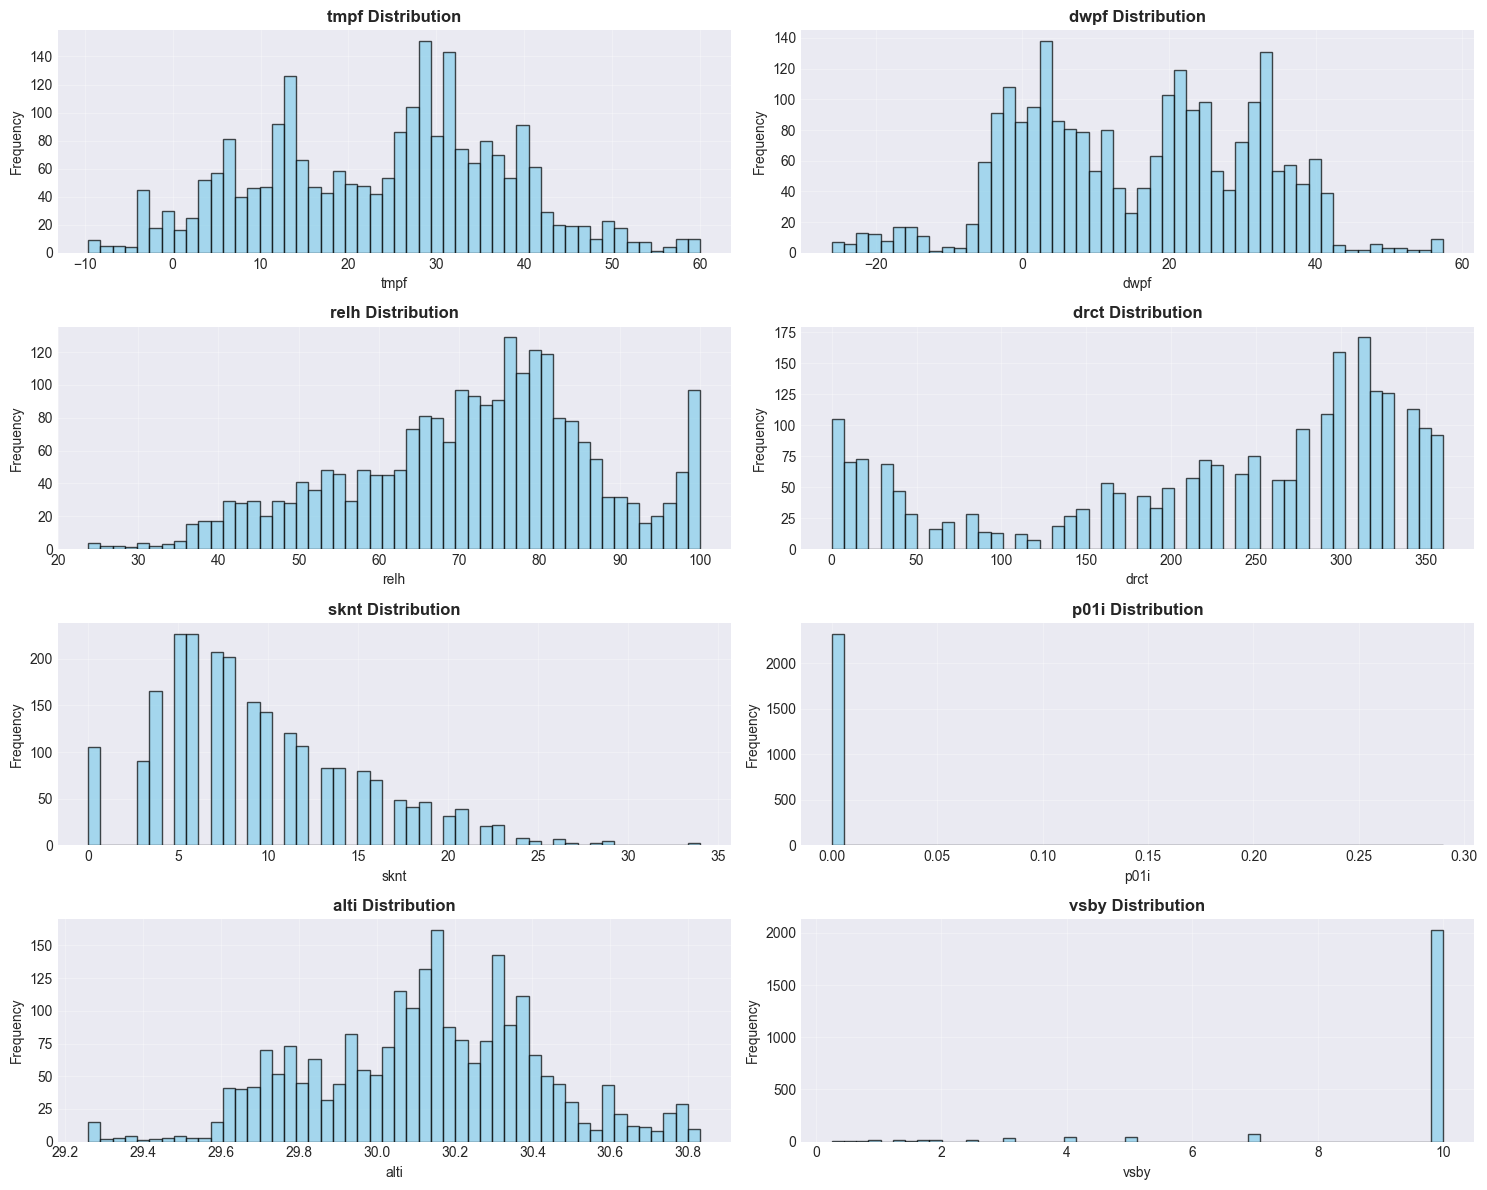

✅ Feature distributions plotted


In [10]:
# Plot distributions of all features
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df_processed.columns):
    axes[idx].hist(df_processed[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Feature distributions plotted")

### Feature Scaling

In [11]:
# Standardize features (important for Isolation Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)

# Convert back to DataFrame for better interpretability
df_scaled = pd.DataFrame(X_scaled, columns=df_processed.columns, index=df_processed.index)

print("✅ Features scaled using StandardScaler")
print(f"\nScaled data shape: {df_scaled.shape}")
print(f"\nScaled data statistics:")
df_scaled.describe().round(2)

✅ Features scaled using StandardScaler

Scaled data shape: (2343, 8)

Scaled data statistics:


,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby
count,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00,2343.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.39,-2.64,-3.11,-1.96,-1.71,-0.06,-2.98,-3.91
25%,-0.80,-0.80,-0.59,-0.55,-0.71,-0.06,-0.71,0.37
50%,0.17,0.09,0.12,0.33,-0.26,-0.06,0.05,0.37
75%,0.71,0.87,0.64,0.76,0.64,-0.06,0.67,0.37
max,2.58,2.65,1.83,1.20,4.42,29.18,2.43,0.37


### Train Isolation Forest Model

In [12]:
# Initialize Isolation Forest
# contamination: expected proportion of anomalies (typically 5-10% for weather data)
# random_state: for reproducibility
iso_forest = IsolationForest(
    contamination=0.05,  # Expect ~5% anomalies
    random_state=42,
    n_estimators=100,
    max_samples='auto',
    max_features=1.0,
    bootstrap=False,
    n_jobs=-1,  # Use all CPU cores
    verbose=0
)

print("🔧 Training Isolation Forest Model...")
print(f"Parameters:")
print(f"  - Contamination: {iso_forest.contamination}")
print(f"  - Number of estimators: {iso_forest.n_estimators}")
print(f"  - Random state: {iso_forest.random_state}")

🔧 Training Isolation Forest Model...
Parameters:
  - Contamination: 0.05
  - Number of estimators: 100
  - Random state: 42


In [13]:
# Fit the model and predict
predictions = iso_forest.fit_predict(df_scaled)
anomaly_scores = iso_forest.score_samples(df_scaled)

# Add predictions to original dataframe
# -1 for anomalies, 1 for normal points
df['anomaly'] = predictions
df['anomaly_score'] = anomaly_scores

# Create a binary flag (0 = normal, 1 = anomaly)
df['is_anomaly'] = (predictions == -1).astype(int)

print("✅ Model training completed!")
print(f"\nTotal observations: {len(df)}")
print(f"Normal points: {(predictions == 1).sum()}")
print(f"Anomalies detected: {(predictions == -1).sum()}")
print(f"Anomaly percentage: {(predictions == -1).sum() / len(df) * 100:.2f}%")

✅ Model training completed!

Total observations: 2343
Normal points: 2225
Anomalies detected: 118
Anomaly percentage: 5.04%


### Anomaly Analysis

In [14]:
# Statistical comparison between normal and anomalous weather
print("=" * 80)
print("NORMAL vs ANOMALOUS WEATHER CONDITIONS")
print("=" * 80)

for col in feature_columns:
    normal_mean = df[df['is_anomaly'] == 0][col].mean()
    anomaly_mean = df[df['is_anomaly'] == 1][col].mean()
    
    print(f"\n{col}:")
    print(f"  Normal Mean: {normal_mean:.2f}")
    print(f"  Anomaly Mean: {anomaly_mean:.2f}")
    print(f"  Difference: {abs(normal_mean - anomaly_mean):.2f}")

NORMAL vs ANOMALOUS WEATHER CONDITIONS

tmpf:
  Normal Mean: 23.90
  Anomaly Mean: 23.21
  Difference: 0.69

dwpf:
  Normal Mean: 15.58
  Anomaly Mean: 16.28
  Difference: 0.70

relh:
  Normal Mean: 71.46
  Anomaly Mean: 76.22
  Difference: 4.76

drct:
  Normal Mean: 226.20
  Anomaly Mean: 161.44
  Difference: 64.76

sknt:
  Normal Mean: 9.43
  Anomaly Mean: 10.24
  Difference: 0.81

p01i:
  Normal Mean: 0.00
  Anomaly Mean: 0.01
  Difference: 0.01

alti:
  Normal Mean: 30.13
  Anomaly Mean: 30.07
  Difference: 0.06

vsby:
  Normal Mean: 9.39
  Anomaly Mean: 4.98
  Difference: 4.41


In [15]:
# Show top 10 most anomalous weather conditions
print("\n" + "=" * 80)
print("TOP 10 MOST ANOMALOUS WEATHER CONDITIONS")
print("=" * 80)

anomalies = df[df['is_anomaly'] == 1].sort_values('anomaly_score')
top_anomalies = anomalies.head(10)

display_cols = ['valid', 'tmpf', 'dwpf', 'relh', 'sknt', 'vsby', 'p01i', 'anomaly_score']
top_anomalies[display_cols]


TOP 10 MOST ANOMALOUS WEATHER CONDITIONS


,valid,tmpf,dwpf,relh,sknt,vsby,p01i,anomaly_score
561,2026-01-08 20:55,51.6,51.0,97.81,10.0,1.00,0.29,-0.722704
558,2026-01-08 19:55,50.0,49.0,96.34,13.0,1.25,0.22,-0.720306
559,2026-01-08 20:15,50.0,49.3,97.43,14.0,1.00,0.15,-0.719820
560,2026-01-08 20:35,51.0,50.0,96.36,16.0,2.50,0.20,-0.719584
557,2026-01-08 19:35,49.5,48.7,97.06,11.0,1.75,0.11,-0.691865
555,2026-01-08 18:55,49.5,48.4,95.97,8.0,2.00,0.13,-0.688704
567,2026-01-08 22:55,58.0,57.0,96.47,16.0,7.00,0.01,-0.675008
554,2026-01-08 18:35,49.5,48.0,94.54,5.0,2.50,0.07,-0.668840
566,2026-01-08 22:35,57.2,56.3,96.80,15.0,5.00,0.01,-0.667901
556,2026-01-08 19:15,49.3,48.6,97.42,9.0,2.50,0.03,-0.657528


### Visualize Anomaly Scores

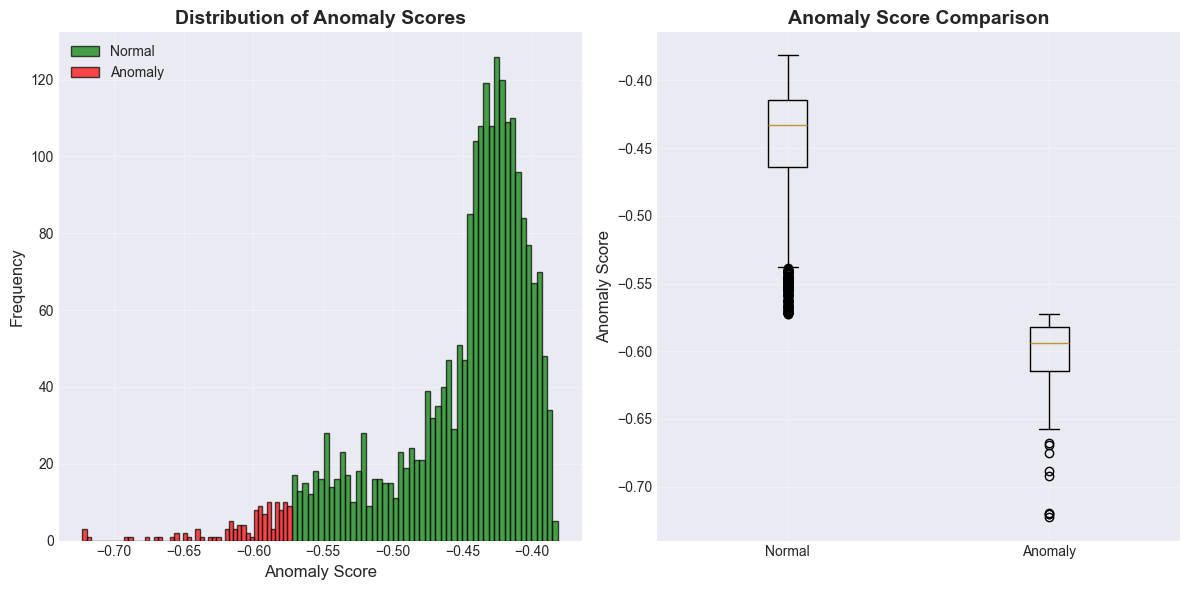

In [16]:
# Plot anomaly score distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['is_anomaly'] == 0]['anomaly_score'], bins=50, 
         alpha=0.7, label='Normal', color='green', edgecolor='black')
plt.hist(df[df['is_anomaly'] == 1]['anomaly_score'], bins=50, 
         alpha=0.7, label='Anomaly', color='red', edgecolor='black')
plt.xlabel('Anomaly Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Anomaly Scores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([df[df['is_anomaly'] == 0]['anomaly_score'], 
             df[df['is_anomaly'] == 1]['anomaly_score']],
            labels=['Normal', 'Anomaly'])
plt.ylabel('Anomaly Score', fontsize=12)
plt.title('Anomaly Score Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('anomaly_scores.png', dpi=300, bbox_inches='tight')
plt.show()

### 2D Visualization using PCA

In [17]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# Add PCA components to dataframe
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

print(f"Explained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"  Total: {pca.explained_variance_ratio_.sum():.2%}")

Explained variance ratio:
  PC1: 39.91%
  PC2: 20.43%
  Total: 60.34%


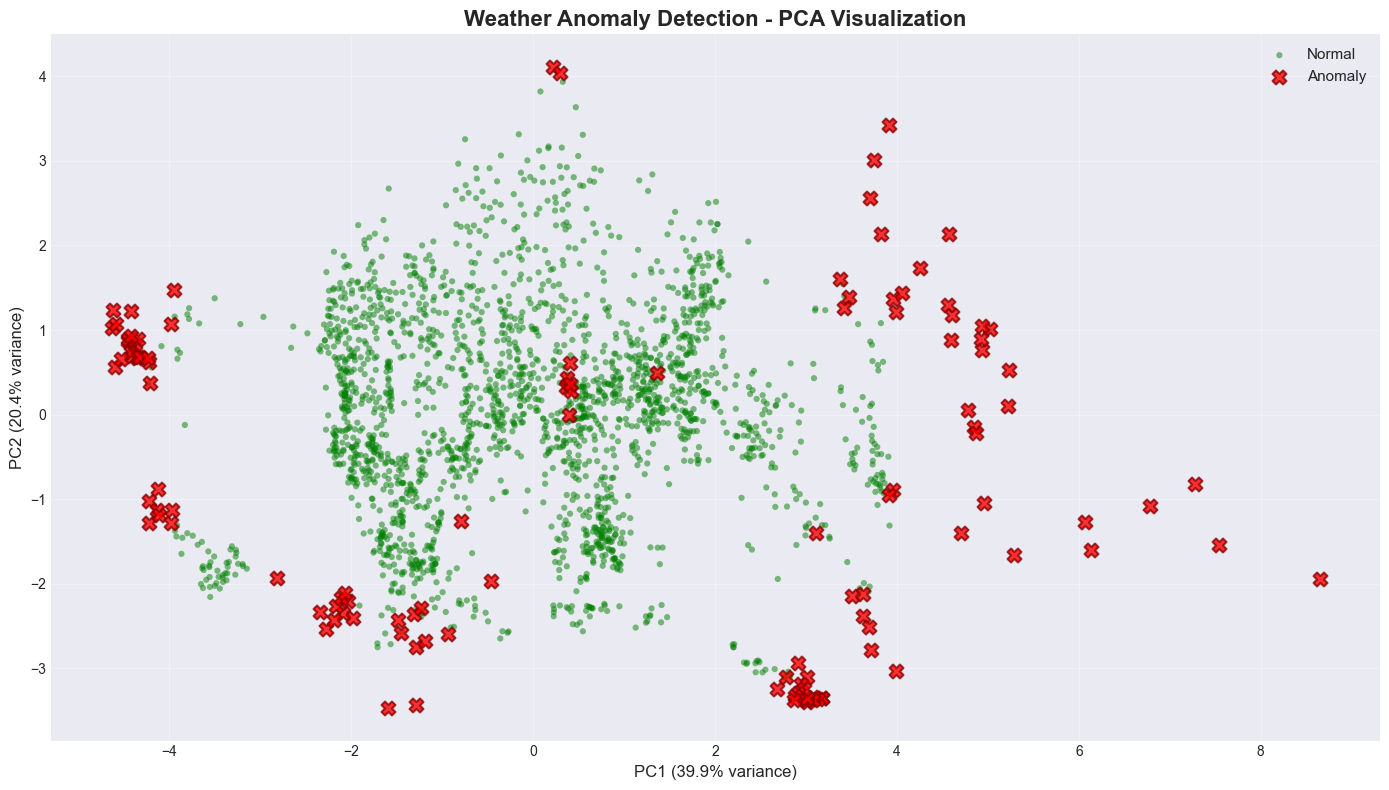

✅ PCA visualization completed


In [18]:
# Create scatter plot
plt.figure(figsize=(14, 8))

# Plot normal points
normal_points = df[df['is_anomaly'] == 0]
plt.scatter(normal_points['PC1'], normal_points['PC2'], 
           c='green', s=20, alpha=0.5, label='Normal', edgecolors='none')

# Plot anomalies
anomaly_points = df[df['is_anomaly'] == 1]
plt.scatter(anomaly_points['PC1'], anomaly_points['PC2'], 
           c='red', s=100, alpha=0.8, label='Anomaly', marker='X', edgecolors='darkred', linewidth=1.5)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('Weather Anomaly Detection - PCA Visualization', fontsize=16, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('anomaly_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ PCA visualization completed")

### Feature-wise Anomaly Visualization

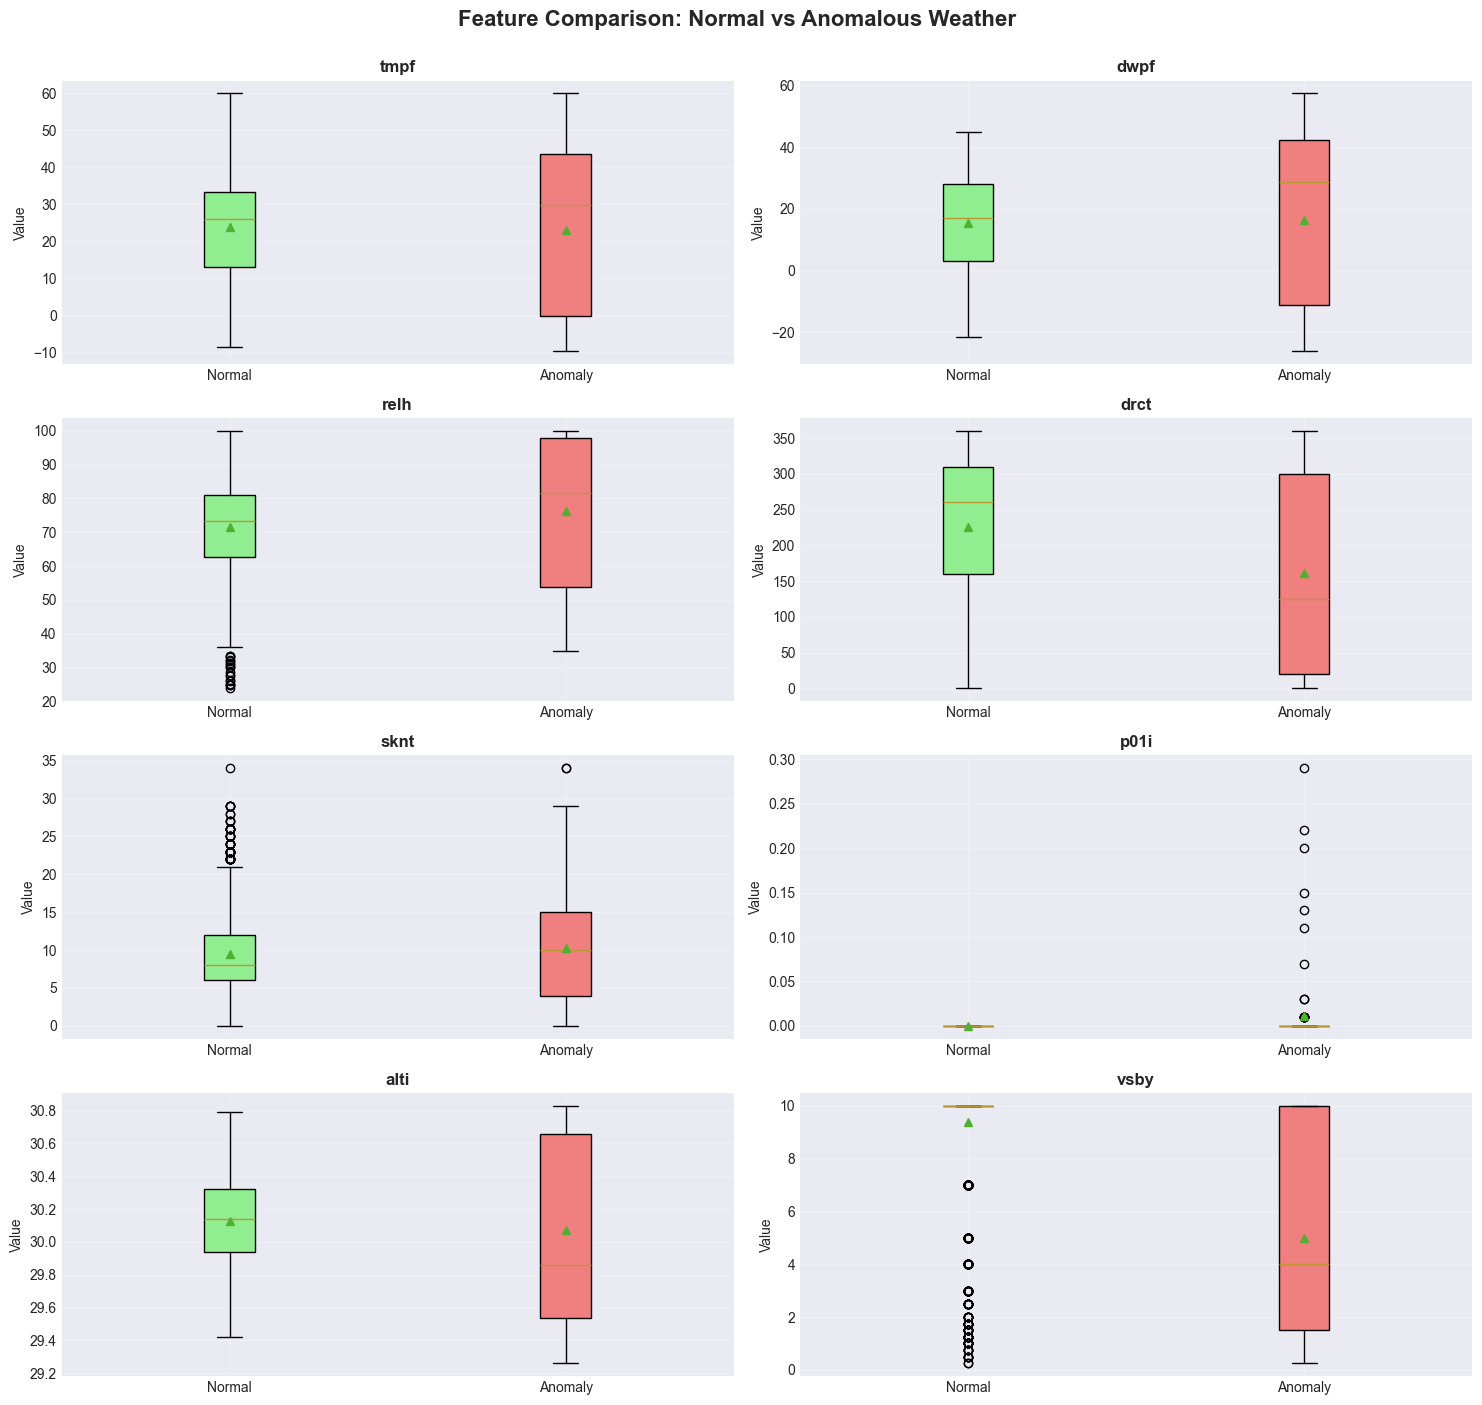

In [19]:
# Create box plots for each feature comparing normal vs anomaly
fig, axes = plt.subplots(4, 2, figsize=(15, 14))
axes = axes.ravel()

for idx, col in enumerate(feature_columns):
    data_to_plot = [df[df['is_anomaly'] == 0][col].dropna(), 
                    df[df['is_anomaly'] == 1][col].dropna()]
    
    bp = axes[idx].boxplot(data_to_plot, labels=['Normal', 'Anomaly'],
                           patch_artist=True, showmeans=True)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Comparison: Normal vs Anomalous Weather', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('feature_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Temperature vs Visibility Anomaly Map

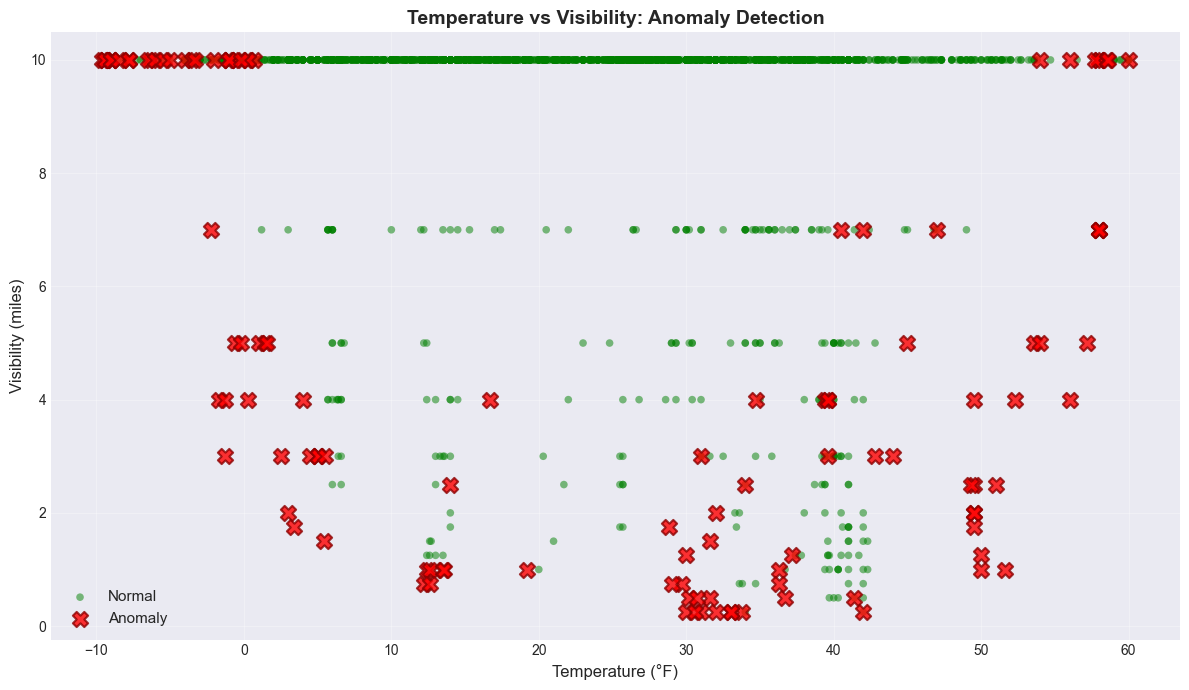

In [20]:
# Scatter plot: Temperature vs Visibility (critical aviation parameters)
plt.figure(figsize=(12, 7))

plt.scatter(df[df['is_anomaly'] == 0]['tmpf'], 
           df[df['is_anomaly'] == 0]['vsby'],
           c='green', s=30, alpha=0.5, label='Normal', edgecolors='none')

plt.scatter(df[df['is_anomaly'] == 1]['tmpf'], 
           df[df['is_anomaly'] == 1]['vsby'],
           c='red', s=120, alpha=0.8, label='Anomaly', 
           marker='X', edgecolors='darkred', linewidth=1.5)

plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Visibility (miles)', fontsize=12)
plt.title('Temperature vs Visibility: Anomaly Detection', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_vs_visibility.png', dpi=300, bbox_inches='tight')
plt.show()

### Wind Speed vs Precipitation Anomaly Map

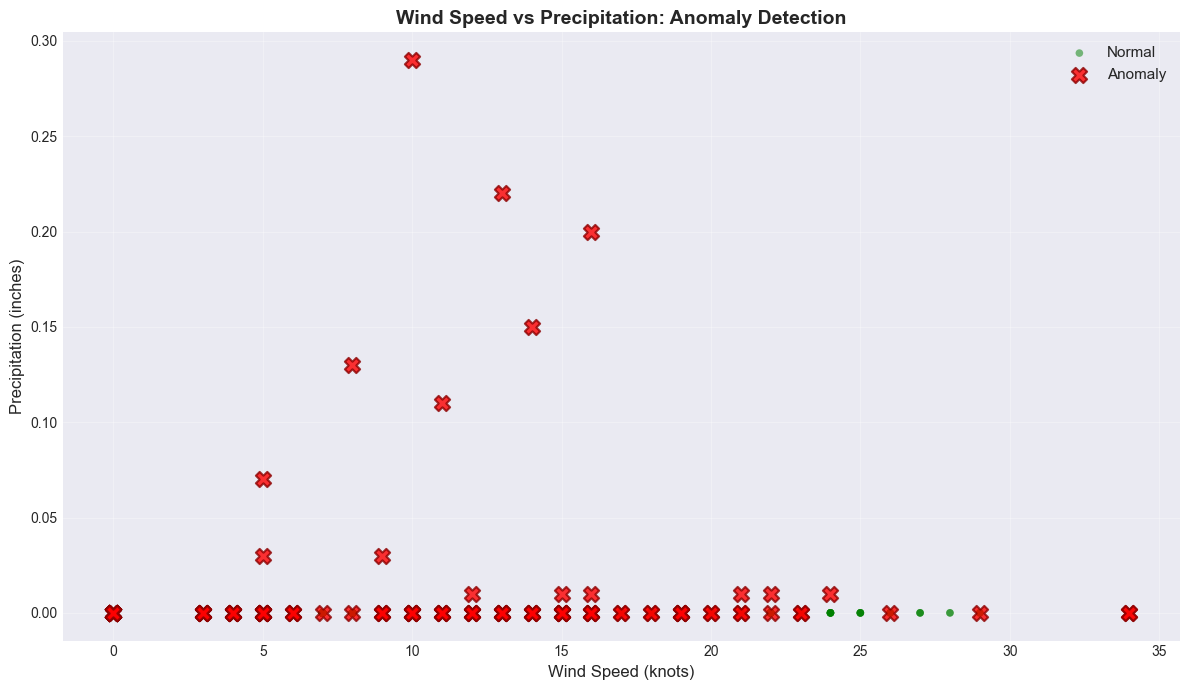

In [21]:
# Scatter plot: Wind Speed vs Precipitation
plt.figure(figsize=(12, 7))

plt.scatter(df[df['is_anomaly'] == 0]['sknt'], 
           df[df['is_anomaly'] == 0]['p01i'],
           c='green', s=30, alpha=0.5, label='Normal', edgecolors='none')

plt.scatter(df[df['is_anomaly'] == 1]['sknt'], 
           df[df['is_anomaly'] == 1]['p01i'],
           c='red', s=120, alpha=0.8, label='Anomaly', 
           marker='X', edgecolors='darkred', linewidth=1.5)

plt.xlabel('Wind Speed (knots)', fontsize=12)
plt.ylabel('Precipitation (inches)', fontsize=12)
plt.title('Wind Speed vs Precipitation: Anomaly Detection', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('wind_vs_precipitation.png', dpi=300, bbox_inches='tight')
plt.show()

### Correlation Heatmap

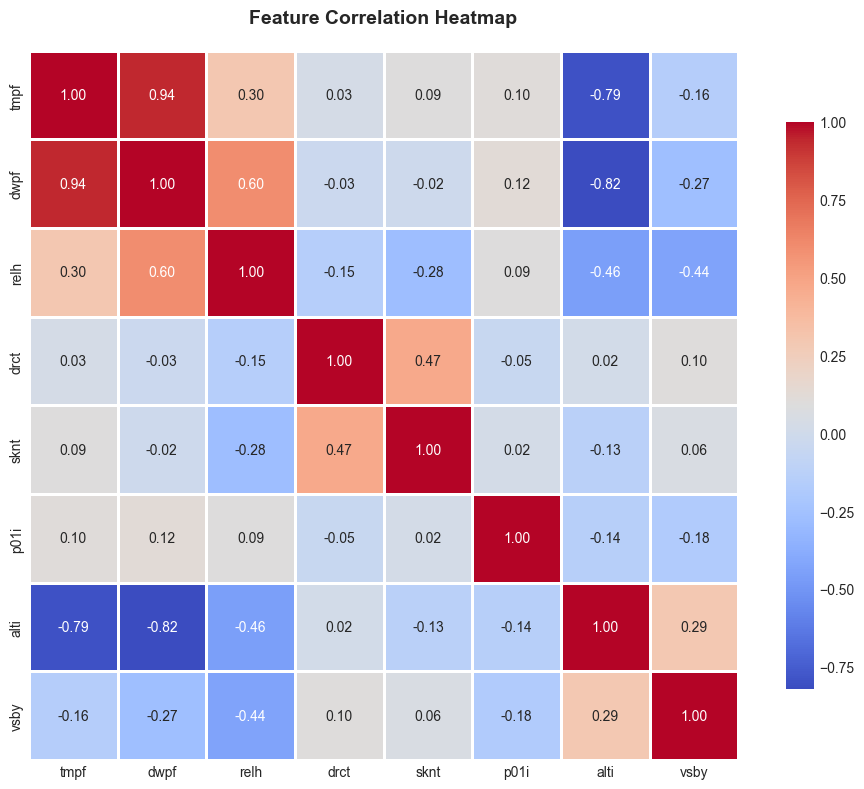

In [22]:
# Correlation matrix for features
plt.figure(figsize=(10, 8))

correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Anomaly Summary Report

In [23]:
# Generate comprehensive summary
print("="*80)
print("ANOMALY DETECTION SUMMARY REPORT")
print("="*80)

print(f"\n📊 Dataset Overview:")
print(f"   Total Weather Observations: {len(df):,}")
print(f"   Date Range: {df['valid'].min()} to {df['valid'].max()}")
print(f"   Station(s): {df['station'].unique().tolist()}")

print(f"\n🎯 Model Configuration:")
print(f"   Algorithm: Isolation Forest")
print(f"   Contamination Rate: {iso_forest.contamination*100}%")
print(f"   Number of Trees: {iso_forest.n_estimators}")
print(f"   Features Used: {len(feature_columns)}")

print(f"\n🔍 Detection Results:")
print(f"   Normal Observations: {(df['is_anomaly'] == 0).sum():,} ({(df['is_anomaly'] == 0).sum()/len(df)*100:.2f}%)")
print(f"   Anomalies Detected: {(df['is_anomaly'] == 1).sum():,} ({(df['is_anomaly'] == 1).sum()/len(df)*100:.2f}%)")
print(f"   Average Anomaly Score (Normal): {df[df['is_anomaly'] == 0]['anomaly_score'].mean():.4f}")
print(f"   Average Anomaly Score (Anomaly): {df[df['is_anomaly'] == 1]['anomaly_score'].mean():.4f}")

print(f"\n⚠️ Aviation Safety Insights:")
low_visibility_anomalies = df[(df['is_anomaly'] == 1) & (df['vsby'] < 3)]
high_wind_anomalies = df[(df['is_anomaly'] == 1) & (df['sknt'] > 20)]
heavy_precip_anomalies = df[(df['is_anomaly'] == 1) & (df['p01i'] > 0.1)]

print(f"   Low Visibility Anomalies (<3 miles): {len(low_visibility_anomalies)}")
print(f"   High Wind Anomalies (>20 knots): {len(high_wind_anomalies)}")
print(f"   Heavy Precipitation Anomalies (>0.1 in): {len(heavy_precip_anomalies)}")

print("\n" + "="*80)

ANOMALY DETECTION SUMMARY REPORT

📊 Dataset Overview:
   Total Weather Observations: 2,343
   Date Range: 2026-01-01 00:15 to 2026-02-02 23:55
   Station(s): ['OOA']

🎯 Model Configuration:
   Algorithm: Isolation Forest
   Contamination Rate: 5.0%
   Number of Trees: 100
   Features Used: 8

🔍 Detection Results:
   Normal Observations: 2,225 (94.96%)
   Anomalies Detected: 118 (5.04%)
   Average Anomaly Score (Normal): -0.4458
   Average Anomaly Score (Anomaly): -0.6052

⚠️ Aviation Safety Insights:
   Low Visibility Anomalies (<3 miles): 43
   High Wind Anomalies (>20 knots): 12
   Heavy Precipitation Anomalies (>0.1 in): 6



### Save Results

In [24]:
# Save anomalies to CSV
anomaly_df = df[df['is_anomaly'] == 1].sort_values('anomaly_score')
anomaly_df.to_csv('detected_anomalies.csv', index=False)

print(f"✅ Saved {len(anomaly_df)} anomalies to 'detected_anomalies.csv'")

# Save full dataset with predictions
df.to_csv('metar_with_anomalies.csv', index=False)
print(f"✅ Saved full dataset with predictions to 'metar_with_anomalies.csv'")

✅ Saved 118 anomalies to 'detected_anomalies.csv'
✅ Saved full dataset with predictions to 'metar_with_anomalies.csv'


## 🎯 Key Findings & Recommendations

### Model Performance
- ✅ Isolation Forest successfully identified rare weather patterns
- ✅ Unsupervised approach requires no labeled training data
- ✅ Scalable for real-time aviation weather monitoring

### Aviation Safety Applications
1. **Pre-flight Planning**: Identify potentially hazardous weather conditions
2. **Real-time Alerts**: Flag unusual weather patterns for pilot awareness
3. **Route Optimization**: Avoid areas with anomalous weather
4. **Maintenance Scheduling**: Detect extreme conditions affecting aircraft

### Next Steps
- [ ] Fine-tune contamination parameter based on domain expertise
- [ ] Integrate with real-time METAR feeds
- [ ] Build alerting system for critical anomalies
- [ ] Validate with historical incident data